<a href="https://colab.research.google.com/github/Staglabite/PraktikumML-B1/blob/main/Tugas1_MochammadQaynanMahdaviqya_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : Mochammad Qaynan Mahdaviqya

NIM  : 24060122140170

Link Dataset : https://archive.ics.uci.edu/dataset/161/mammographic+mass

1).  Lakukan Eksplorasi terhadap algoritma klasifikasi lain pada dataset Iris (minimal 2)

In [29]:
import pandas

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pandas.read_csv(url, names=names)

In [30]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [31]:
array = dataset.values

X = array[:,0:4]

Y = array[:,4]

validation_size = 0.20

seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [32]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [33]:
# Spot Check Algorithms
models = []

models.append(('DT', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

  print(msg)

DT: 0.950000 (0.076376)
SGD: 0.841667 (0.101721)


Kode diatas bakal mengevaluasi menggunakan algoritma Decision Tree dan Stochastic Gradient Descent dengan menggunakan 10-fold cross-validation dan menampilkan rata-rata dan standar deviasi dari skor akurasi.

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [35]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions_DT = DT.predict(X_validation)
cm_DT = confusion_matrix(Y_validation, predictions_DT)
print("Confusion Matrix (Decision Tree):\n", cm_DT)
cr_DT = classification_report(Y_validation, predictions_DT)
print("\nClassification Report (Decision Tree):\n", cr_DT)

# SGD
SGD = SGDClassifier()
SGD.fit(X_train, Y_train)
predictions_SGD = SGD.predict(X_validation)
cm_SGD = confusion_matrix(Y_validation, predictions_SGD)
print("\nConfusion Matrix (SGD):\n", cm_SGD)
cr_SGD = classification_report(Y_validation, predictions_SGD)
print("\nClassification Report (SGD):\n", cr_SGD)

Confusion Matrix (Decision Tree):
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

Classification Report (Decision Tree):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30


Confusion Matrix (SGD):
 [[6 1 0]
 [0 8 4]
 [0 2 9]]

Classification Report (SGD):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.86      0.92         7
Iris-versicolor       0.73      0.67      0.70        12
 Iris-virginica       0.69      0.82      0.75        11

       accuracy                           0.77        30
      macro avg       0.81      0.78      0.79        30
   weighted avg       0.78      0.77      0.77        30

Kode diatas akan mendapatkan confusion matrix dan classification report untuk kedua model, Decision Tree dan SGD. Untuk mengevaluasi performa kedua model tersebut secara lebih komprehensif.

2). Cari dataset lain dari repository UCI Machine Learning
- lakukan keenam langkah untuk menampilkan summary dataset pada modul 1
- ⁠kemudian buat evaluasi algoritma dengan menggunakan 3 model yaitu KNN, NB, dan SVM

In [36]:
import pandas as pd
import numpy as np

In [37]:
file_path = '/content/Mammographic_Mass.csv'

name = ['BI-RADS','Age','Shape','Margin','Density','Severity']

dataset = pandas.read_csv(file_path, names=name)

Import dataset

In [38]:
print(dataset.shape)

(830, 6)


Potongan kode program di atas digunakan untuk mencetak bentuk (shape)
dari variabel dataset. Perintah ini nantinya mengembalikan tuple yang berisi dua
nilai, yakni jumlah baris dan jumlah kolom dalam dataset. Baris tersebut mengacu
pada jumlah record data yang ada pada dataset, sementara kolom tersebut
mengacu pada jumlah atribut yang ada pada dataset. Dalam dataset
mammographic mass yang digunakan memiliki 830 record data dan 6 atribut.

In [39]:
pd.set_option('display.max_columns', None)

pd.set_option('display.width', 1000)

print(dataset.head(20))

    BI-RADS  Age  Shape  Margin  Density  Severity
0         5   67      3       5        3         1
1         5   58      4       5        3         1
2         4   28      1       1        3         0
3         5   57      1       5        3         1
4         5   76      1       4        3         1
5         3   42      2       1        3         1
6         4   36      3       1        2         0
7         4   60      2       1        2         0
8         4   54      1       1        3         0
9         3   52      3       4        3         0
10        4   59      2       1        3         1
11        4   54      1       1        3         1
12        5   56      4       3        1         1
13        5   42      4       4        3         1
14        4   59      2       4        3         1
15        5   75      4       5        3         1
16        5   45      4       5        3         1
17        5   55      4       4        3         0
18        4   46      1       5

Dataset mammographic mass ini merupakan data kategorikal dengan
memiliki 6 kolom, yaitu BI-RADS, Age, Shape, Margin, Density, dan Severity.

In [40]:
print(dataset.groupby('Severity').size())

Severity
0    427
1    403
dtype: int64


Perintah di atas digunakan dalam melakukan pengelompokkan data
berdasarkan kolom ‘Severity’ dan menghitung jumlah entri atau baris dalam
setiap kelompok. Dalam dataset untuk memprediksi tingkat keparahan potensi
penderita kanker payudara (0 untuk tingkat keparahan rendah atau jinak dan 1
untuk tingkat keparahan tinggi atau ganas), perintah ini menghasilkan ouput
jumlah pasien dalam masing-masing kelompok hasil (Severity). Berdasarkan hasil
di atas, ada 427 pasien yang memiliki tingkat potensi penderita kanker payudara
dengan keparahan rendah atau jinak (Severity = 0) dan 403 pasien yang memiliki
tingkat potensi penderita kanker payudara dengan keparahan tinggi atau ganas
(Severity = 1).

In [41]:
print(dataset.describe())

          BI-RADS         Age       Shape      Margin     Density    Severity
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663    0.485542
std      1.888371   14.671782    1.242361    1.567175    0.350936    0.500092
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000


Perintah di atas digunakan untuk menghasilkan ringkasan statistik
deskriptif dari dataset mammographic mass. Statistik deskriptif tersebut mencakup
ukuran statistik yang relevan untuk setiap kolom dalam dataset, seperti rata-rata,
standar deviasi, nilai minimum, nilai maksimum, dan kuartil.

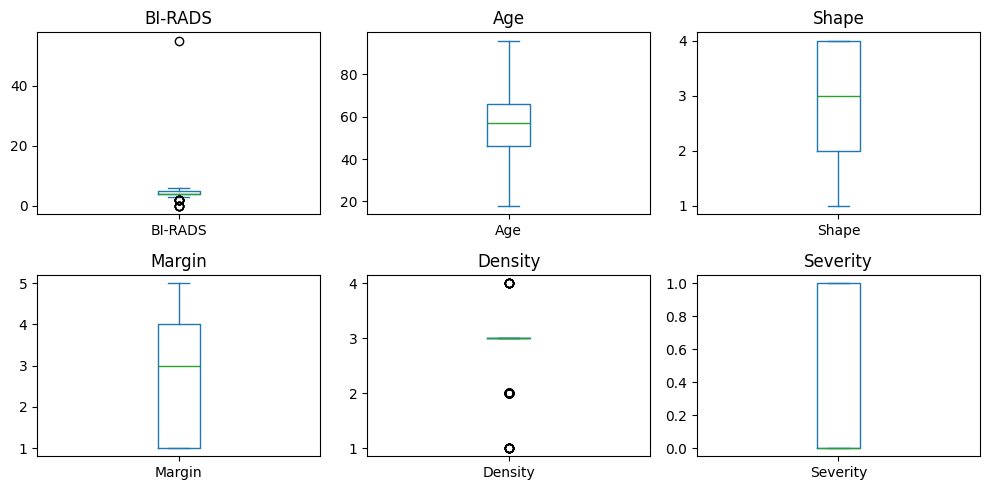

In [42]:
import matplotlib.pyplot as plt

n_cols = 3
n_rows = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))

for i, col in enumerate(dataset.columns):
  ax = axes[i // n_cols, i % n_cols]
  dataset[col].plot(kind='box', ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

Kode di atas menggunakan library Matplotlib untuk membuat diagram
box plot untuk setiap kolom dalam dataset diabetes. Box plot merupakan jenis
grafik statistik yang digunakan untuk menggambarkan distribusi data dalam
dataset dengan jelas. Box plot memberikan wawasan tentang statistik deskriptif.

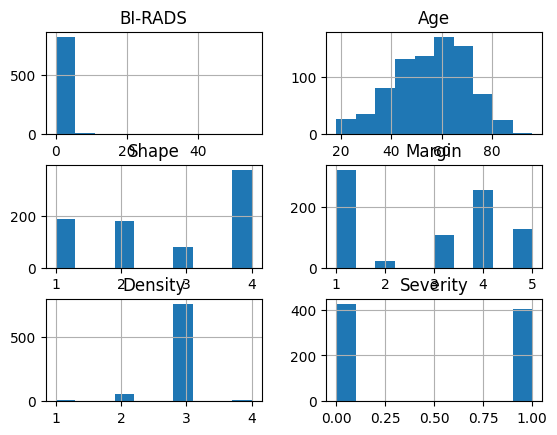

In [43]:
dataset.hist()
plt.show()

Kode di atas digunakan untuk menghasilkan histogram untuk setiap kolom
numerik dalam dataset. Histogram adalah representasi grafis yang berguna untuk
menampilkan distribusi frekuensi dari data numerik. Pada histogram, sumbu X
menggambarkan rentang nilai atau interval data, dengan setiap interval atau
"bin" mewakili jumlah data yang jatuh dalam rentang tersebut. Sementara itu,
sumbu Y menunjukkan frekuensi atau jumlah data yang termasuk dalam setiap
interval atau bin di sumbu X. Tinggi batang histogram pada sumbu Y
mencerminkan seberapa sering nilai-nilai data jatuh dalam interval tersebut.

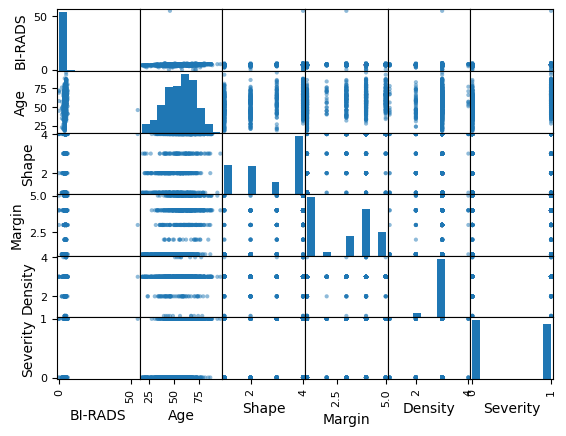

In [44]:
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

Dalam scatter plot, data direpresentasikan sebagai titik-titik dalam ruang
dua dimensi, di mana satu sumbu mewakili variabel independen (X) dan sumbu
lainnya mewakili variabel dependen (Y). Scatter plot memungkinkan kita untuk
mengamati hubungan antara dua variabel, yang dapat berupa korelasi positif atau
korelasi negatif.

In [45]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
array = dataset.values

X = array[:,0:4]

Y = array[:,4]

validation_size = 0.20

seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Setelah perintah di atas dieksekusi, kita sudah memiliki dua data yaitu
X_train dan Y_train untuk mempersiapkan model dan rangkaian X_validation
dan Y_validation yang dapat digunakan selanjutnya.

In [47]:
seed = 7
scoring = 'accuracy'

Kita akan menggunakan validasi silang 10 kali lipat untuk
memperkirakan akurasi. Untuk itu dataset dibagi menjadi 10 bagian, 9
untuk latihan dan 1 untuk pengujian dan ulangi untuk semua kombinasi.

In [48]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.912551 (0.038840)
NB: 0.903641 (0.046072)
SVM: 0.914089 (0.038277)


Untuk mengetahui algoritma yang cocok dengan studi kasus ini maka
kita harus mengevaluasi dengan beberapa algoritma. Pada praktikum kali
ini hanya akan membahas tiga model yaitu K-Nearest Neighbors (KNN),
Gaussian Naive Bayes (NB) dan Support Vector Machines (SVM).

Dari hasil output di atas, kita dapat melihat bahwa SVM memiliki nilai
akurasi perkiraan terbesar. Setelah mengetahui model yang paling akurat
yaitu SVM, selanjutnya kita dapat mencoba melakukan pengujian tentang
keakuratan model SVM terhadap data yang ada.

In [49]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=0))

0.891566265060241
[[  0   0   2]
 [  0   0  16]
 [  0   0 148]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        16
           3       0.89      1.00      0.94       148

    accuracy                           0.89       166
   macro avg       0.30      0.33      0.31       166
weighted avg       0.79      0.89      0.84       166

